<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/db_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# Imports
import pandas as pd
import numpy as np

In [0]:
# Look at the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [2]:
# Data is missing header names. Let's throw some together and set the url to 
# a variable
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

In [0]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole-Weight', 
                'Shucked-weight', 'Viscera-weight', 'Shell-weight', 'rings']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [0]:
# Read in the data
df = pd.read_csv(url, header=None, names=column_names)

In [7]:
# Look at the first five rows
df.head()

,Sex,Length,Diameter,Height,Whole-Weight,Shucked-weight,Viscera-weight,Shell-weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
# Look at the last five rows
df.tail()

,Sex,Length,Diameter,Height,Whole-Weight,Shucked-weight,Viscera-weight,Shell-weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [9]:
# Everything appears to be in order. Let's check for the correct number of rows
# and columns now.
df.shape

(4177, 9)

In [10]:
# These numbers also seem to be correct. Now check for null values. The UCI 
# states that there should not be any. Let's confirm that.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole-Weight      0
Shucked-weight    0
Viscera-weight    0
Shell-weight      0
rings             0
dtype: int64

In [15]:
# Check the summary statistics of the dataset
df.describe()

,Length,Diameter,Height,Whole-Weight,Shucked-weight,Viscera-weight,Shell-weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [42]:
# Upload dataset through google.colab method
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris.data


In [43]:
# Read in the data and check the first five rows
df2 = pd.read_csv('iris.data')
df2.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [44]:
# The data is missing column names, so let's create our list of column names 
# and re-read in the data.
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [0]:
column_names2 = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [49]:
# Re-read in the data with the column names and look at the first five rows
df2 = pd.read_csv('iris.data', header=None, names=column_names2)
df2.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# Look at the last five rows of dataset
df2.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
# Look at the data's shape
df2.shape

(150, 5)

In [52]:
# Check for null values
df2.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [53]:
# Check the data's summary statistics
df2.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Re-read in the first dataset
df = pd.read_csv(url, header=None, names=column_names)

In [57]:
df.head()

,Sex,Length,Diameter,Height,Whole-Weight,Shucked-weight,Viscera-weight,Shell-weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [62]:
# Check datatypes of dataframe 1 for categorical data
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole-Weight      float64
Shucked-weight    float64
Viscera-weight    float64
Shell-weight      float64
rings               int64
dtype: object

In [63]:
# Check datatypes of dataframe 2 for categorical data
df2.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [0]:
# Both datasets have only one object. Let's use a different dataset for this problem
# Start by checking the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [67]:
# Check the column names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

In [0]:
# Create a list of the column names we need
column_names3 = ['age', 'sex', 'chest-pain-type', 'resting-bp', 'cholesterol', 
                 'fasting-blood-sugar', 'resting-ecg', 'max-hr',
                 'exercise-induced-angina', 'oldpeak', 'slope', 
                 'colored-vessels', 'thal', 'diagnosis-of-heart-disease']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [70]:
# Read in the data with our column names
df3 = pd.read_csv(url, header=None, names=column_names3)
df3.head()

,age,sex,chest-pain-type,resting-bp,cholesterol,fasting-blood-sugar,resting-ecg,max-hr,exercise-induced-angina,oldpeak,slope,colored-vessels,thal,diagnosis-of-heart-disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [71]:
# Check datatypes of dataframe 3 for categorical data
df3.dtypes

age                           float64
sex                           float64
chest-pain-type               float64
resting-bp                    float64
cholesterol                   float64
fasting-blood-sugar           float64
resting-ecg                   float64
max-hr                        float64
exercise-induced-angina       float64
oldpeak                       float64
slope                         float64
colored-vessels                object
thal                           object
diagnosis-of-heart-disease      int64
dtype: object

In [72]:
# Look further into the diagnosis of heart disease column
df3['diagnosis-of-heart-disease'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis-of-heart-disease, dtype: int64

In [73]:
# Look further into the chest pain type column
df3['chest-pain-type'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: chest-pain-type, dtype: int64

In [90]:
# Let's use the above two columns for our crosstab
cross1 = pd.crosstab(df3['diagnosis-of-heart-disease'], df3['chest-pain-type'])
cross1

chest-pain-type,1.0,2.0,3.0,4.0
diagnosis-of-heart-disease,,,,
0,16,41,68,39
1,5,6,9,35
2,1,1,4,30
3,0,2,4,29
4,1,0,1,11


In [91]:
# Create a second crosstab
cross2 = pd.crosstab(df3['chest-pain-type'], df3['exercise-induced-angina'])
cross2

exercise-induced-angina,0.0,1.0
chest-pain-type,,
1.0,19,4
2.0,46,4
3.0,75,11
4.0,64,80


In [92]:
# Create a third crosstab
cross3 = pd.crosstab(df3['sex'], df3['chest-pain-type'])
cross3

chest-pain-type,1.0,2.0,3.0,4.0
sex,,,,
0.0,4,18,35,40
1.0,19,32,51,104


In [93]:
# Create a fourth crosstab
cross4 = pd.crosstab(df3['sex'], df3['diagnosis-of-heart-disease'])
cross4

diagnosis-of-heart-disease,0,1,2,3,4
sex,,,,,
0.0,72,9,7,7,2
1.0,92,46,29,28,11


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

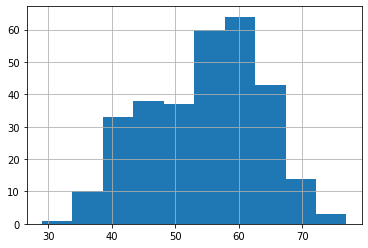

In [80]:
# Visualize the age column with a histogram
df3['age'].hist();

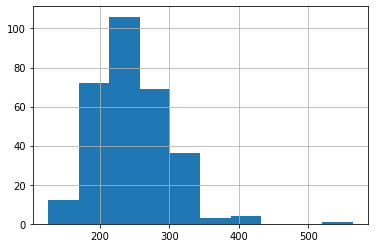

In [81]:
# Visualize the cholesterol column with a histogram
df3['cholesterol'].hist();

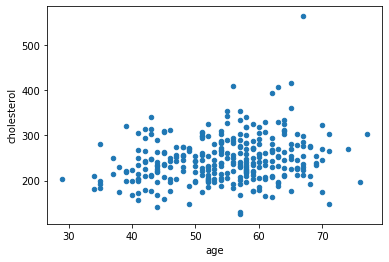

In [82]:
# Compare the age and cholesterol columns with a scatterplot
df3.plot.scatter('age', 'cholesterol');

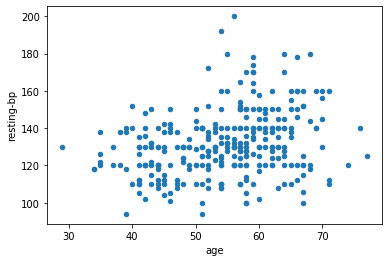

In [84]:
# Compare the age and resting-bp columns with a scatterplot
df3.plot.scatter('age', 'resting-bp');

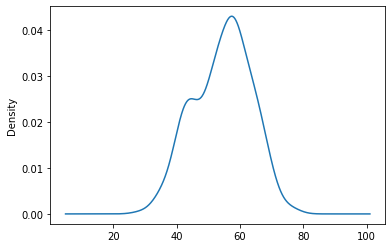

In [86]:
# Visualiz the age column with a density plot
df3['age'].plot.density();

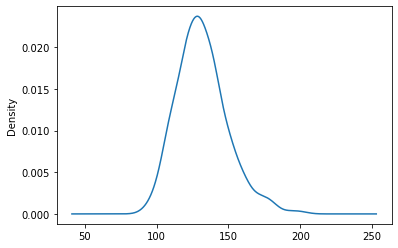

In [88]:
# Visualize the resting-bp column with a density plot
df3['resting-bp'].plot.density();

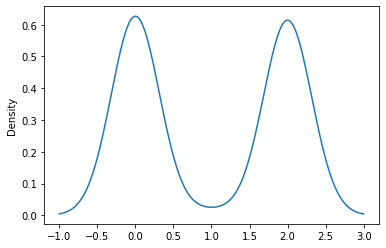

In [89]:
# Visualize the resting-ecg column with a density plot
df3['resting-ecg'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


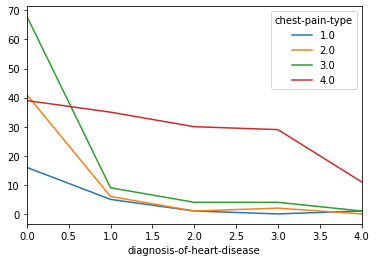

In [94]:
# Visualized our first crosstab with a line plot
cross1.plot();

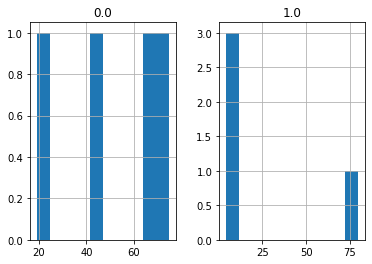

In [103]:
# Visualize our second crosstab with a histogram plot
cross2.hist();

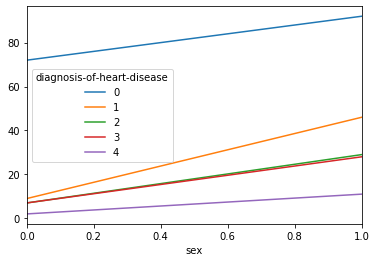

In [104]:
# Visualize our fourth crosstab with a line plot
cross4.plot();

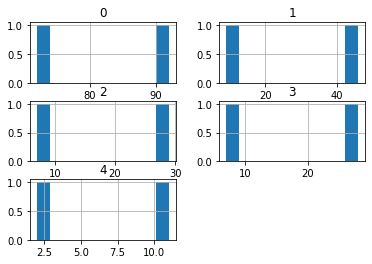

In [105]:
# Visualize our fourth crosstab with a histogram plot
cross4.hist();

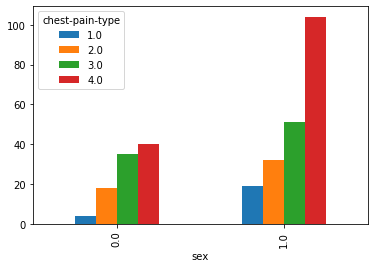

In [106]:
# Visualize our third crosstab with a bar plot
cross3.plot.bar();

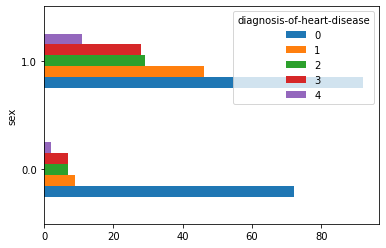

In [109]:
# Visualize our fourth crosstab with a bar plot
cross4.plot.barh();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

## Practice Exploring other Datasets

In [0]:
# Check the raw data of the dataset
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2

In [0]:
# Check the given attributes/column names of the dataset
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names

In [0]:
# Create column names and a variable that holds the dataset's url
bridge_columns = ['identifier', 'river', 'location', 'erected', 'purpose', 
                  'length', 'lanes', 'clear-g', 't-or-d', 'material', 'span', 
                  'rel-l', 'type']
bridge_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2'

In [120]:
# Read in dataset and view first five rows
pitts_bridges = pd.read_csv(bridge_url, header=None, names=bridge_columns)
pitts_bridges.head()

,identifier,river,location,erected,purpose,length,lanes,clear-g,t-or-d,material,span,rel-l,type
0,E1,M,3,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,CRAFTS,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [121]:
# View the last five rows
pitts_bridges.tail()

,identifier,river,location,erected,purpose,length,lanes,clear-g,t-or-d,material,span,rel-l,type
103,E84,A,24,MODERN,HIGHWAY,SHORT,6,G,THROUGH,STEEL,MEDIUM,F,ARCH
104,E91,O,44,MODERN,HIGHWAY,LONG,6,G,THROUGH,STEEL,LONG,F,ARCH
105,E90,M,7,MODERN,HIGHWAY,SHORT,6,G,THROUGH,STEEL,LONG,F,ARCH
106,E100,O,43,MODERN,HIGHWAY,?,?,G,?,?,?,F,?
107,E109,A,28,MODERN,HIGHWAY,?,?,G,?,?,?,F,?


In [122]:
# Check the dataframe's shape 
pitts_bridges.shape

(108, 13)

In [124]:
# Look into the statistical summary of the dataframe
pitts_bridges.describe()

,identifier,river,location,erected,purpose,length,lanes,clear-g,t-or-d,material,span,rel-l,type
count,108,108,108,108,108,108,108,108,108,108,108,108,108
unique,108,4,55,4,4,4,5,3,3,4,4,4,8
top,E65,A,39,MATURE,HIGHWAY,MEDIUM,2,G,THROUGH,STEEL,MEDIUM,F,SIMPLE-T
freq,1,49,5,54,71,48,61,80,87,79,53,58,44


In [125]:
# Look at the datatypes of each column in the dataframe
pitts_bridges.dtypes

identifier    object
river         object
location      object
erected       object
purpose       object
length        object
lanes         object
clear-g       object
t-or-d        object
material      object
span          object
rel-l         object
type          object
dtype: object

In [126]:
# Check for null values in the dataframe
pitts_bridges.isnull().sum()

identifier    0
river         0
location      0
erected       0
purpose       0
length        0
lanes         0
clear-g       0
t-or-d        0
material      0
span          0
rel-l         0
type          0
dtype: int64

In [128]:
erected_by_length = pd.crosstab(pitts_bridges['erected'], pitts_bridges['length'])
erected_by_length

length,?,LONG,MEDIUM,SHORT
erected,,,,
CRAFTS,7,0,10,1
EMERGING,6,1,8,0
MATURE,10,15,24,5
MODERN,4,5,6,6


In [0]:
# A quick note: We have a question mark, which is indicative of empty values not identified 
# by the isnull command